<a href="https://colab.research.google.com/github/nizarmahi/Machine-Learning-24-25/blob/main/Week7/Week7Tugas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tugas

Buatlah sebuah model K-Means dengan ketentuan,

1. Gunakan data 'Mall_Customers.csv'

2. Tentukan fitur apa yang tepat untuk melakukan clustering (minimal 2)

3. Buatlah model K-Means dengan mempertimbangkan jumlah 'k' yang terbaik.

Buatlah implementasi model SOM untuk segmentasi citra lain

# Model KMenas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

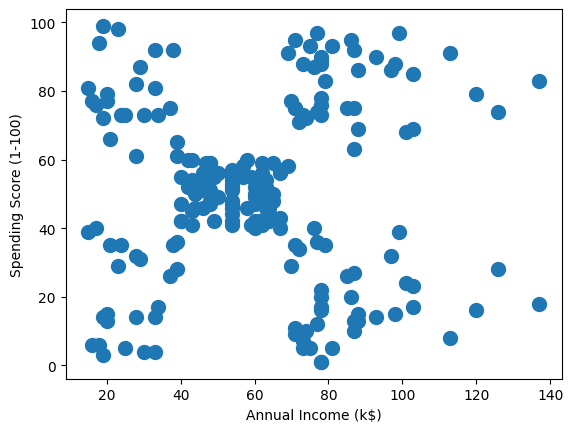

In [ ]:
# load dataset
df = pd.read_csv('/content/Mall_Customers.csv')

# pilih fitur yang relevan
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Plot data untuk melihat distribusi awal
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s=100)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

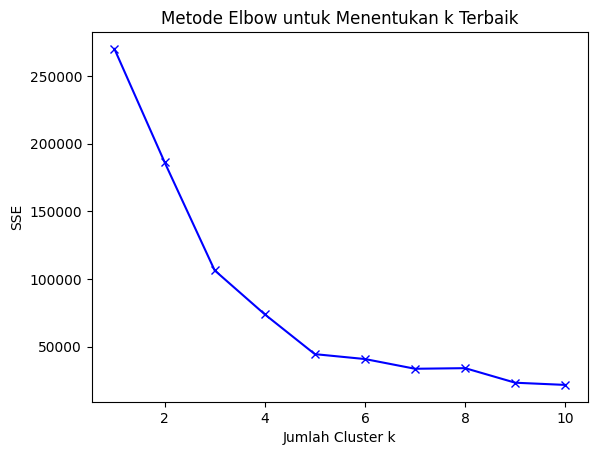

In [ ]:

# Tentukan k terbaik menggunakan metode elbow
sse = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

# Plot elbow method
plt.plot(K, sse, 'bx-')
plt.xlabel('Jumlah Cluster K')
plt.ylabel('SSE')
plt.title('Metode Elbow untuk Menentukan k Terbaik')
plt.show()

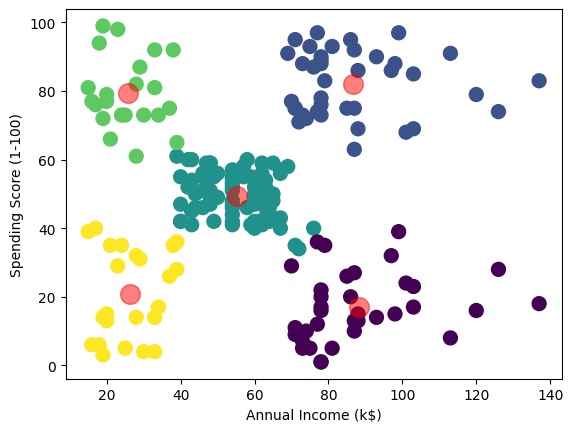

In [ ]:
# Setelah menentukan k terbaik, buat model K-Means
k_optimal = 5  # Misalkan k=5
kmeans = KMeans(n_clusters=k_optimal)
y_kmeans = kmeans.fit_predict(X)

# Plot hasil clustering
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_kmeans, s=100, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, alpha=0.5)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

# Implementasi SOM untuk Segmentasi Citra

In [ ]:
pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.3-py3-none-any.whl size=11706 sha256=05731e360d7333cea080eb3f758fc5898b73cd1eb2a5d18de730e71a330133ad
  Stored in directory: /root/.cache/pip/wheels/96/98/a5/52dee3e8ed1dbfc4d77e4da41b6d89dd7ab9ead1b921e766f8
Successfully built minisom


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from minisom import MiniSom
from PIL import Image

In [13]:
# Fungsi untuk menginisialisasi bobot SOM
def initialize_weights(input_shape, output_shape):
    return np.random.rand(output_shape[0], output_shape[1], input_shape[2])

In [14]:
# Fungsi untuk menghitung jarak antara vektor input dan bobot SOM
def calculate_distance(input_vector, weights):
    return np.linalg.norm(input_vector - weights, axis=2)

In [15]:
# Fungsi untuk menemukan indeks unit pemenang (unit dengan bobot terdekat)
def find_winner_unit_in_image(input_vector, weights):
    distances = calculate_distance(input_vector, weights)
    return np.unravel_index(np.argmin(distances), distances.shape)

In [16]:
# Fungsi untuk memperbarui bobot SOM
def update_weights(input_vector, weights, winner, learning_rate, neighborhood_radius):
    distances = np.linalg.norm(np.indices(weights.shape[:2]).T - np.array(winner).reshape(1, -1), axis=2)
    influence = np.exp(-distances / (2 * neighborhood_radius**2))
    weights += learning_rate * influence[:, :, np.newaxis] * (input_vector - weights)

In [17]:
# Fungsi untuk melatih SOM
def train_som(image, num_epochs, initial_learning_rate, initial_neighborhood_radius):
    input_shape = image.shape
    som_shape = (10, 10, input_shape[2])  # Ukuran SOM sesuai dengan jumlah saluran warna
    weights = initialize_weights(input_shape, som_shape)

    for epoch in range(num_epochs):
        # Update parameter pembelajaran dan radius tetangga
        learning_rate = initial_learning_rate * np.exp(-epoch / num_epochs)
        neighborhood_radius = initial_neighborhood_radius * np.exp(-epoch / num_epochs)
        # Pemrosesan SOM
        for i in range(input_shape[0]):
            for j in range(input_shape[1]):
                input_vector = image[i, j, :]
                winner = find_winner_unit_in_image(input_vector, weights)
                update_weights(input_vector, weights, winner, learning_rate, neighborhood_radius)

    return weights

In [18]:
# Load citra Lenna (Anda bisa mengganti ini dengan citra lain jika diperlukan)
# Lenna_path = "/content/Lenna.png"
# Lenna = io.imread(Lenna_path) / 255.0  # Normalisasi intensitas piksel menjadi rentang [0, 1]

# Load citra baru
image_path = '/content/photo.jpg'
image = io.imread(image_path) / 255.0  # Normalisasi intensitas piksel

In [20]:
# Latih SOM
num_epochs = 20
initial_learning_rate = 0.1
initial_neighborhood_radius = 5
trained_weights = train_som(image, num_epochs, initial_learning_rate, initial_neighborhood_radius)

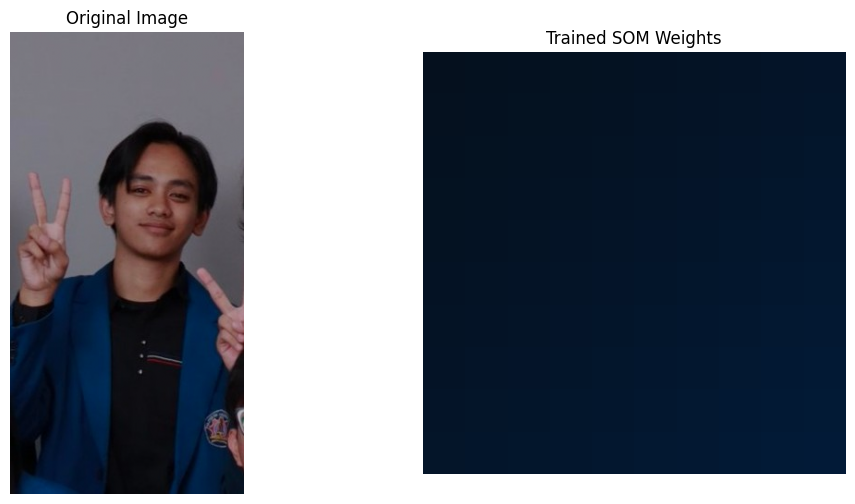

In [22]:
# Visualisasi Gambar Asli dan Bobot SOM
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # Buat layout 1 baris, 2 kolom

# Tampilkan Gambar Asli
axes[0].imshow(image)
axes[0].set_title("Original Image")
axes[0].axis('off')  # Hilangkan axis

# Tampilkan Bobot SOM
axes[1].imshow(trained_weights)
axes[1].set_title("Trained SOM Weights")
axes[1].axis('off')

# Tampilkan plot
plt.show()